In [233]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from sklearn import preprocessing 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.model_selection import KFold,LeaveOneOut, RandomizedSearchCV

In [234]:
data = pd.read_csv("auto.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [235]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [236]:
def dataClean(data):
    #ind = pd.get_dummies(data, columns = ['cylinders']).drop(['horsepower','weight','year','origin','name','mpg'],axis = 1)
    ind = data.drop(['horsepower','weight','year','origin','name','mpg'],axis = 1)
    ind[['acceleration']] = np.log(ind[['acceleration']])
    ind[['displacement']] = np.log(ind[['displacement']])
    ind[['cylinders']] = np.multiply(ind[['cylinders']],ind[['cylinders']])
    return ind 

In [237]:
ind = dataClean(data)
dep = np.log(data[['mpg']])
dataMod = pd.concat([dep,ind],axis=1)
dataMod.head()

,mpg,cylinders,displacement,acceleration
0,2.890372,64,5.726848,2.484907
1,2.708050,64,5.857933,2.442347
2,2.890372,64,5.762051,2.397895
3,2.772589,64,5.717028,2.484907
4,2.833213,64,5.710427,2.351375


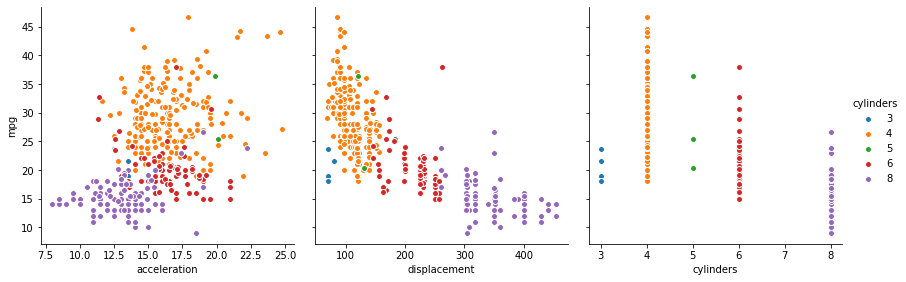

In [238]:
hue = 'cylinders'
g1 = sns.PairGrid(data, y_vars = ['mpg'], x_vars = ['acceleration','displacement','cylinders'],hue = hue, height = 4)
g1.map(plt.scatter, edgecolor = "white")
g1.add_legend()

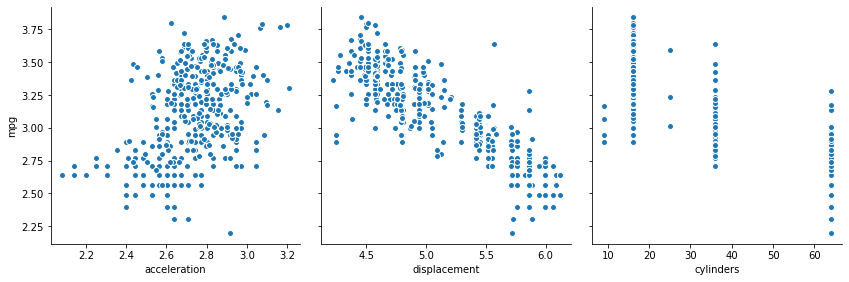

In [239]:
g2 = sns.PairGrid(dataMod, y_vars = ['mpg'], x_vars = ['acceleration','displacement','cylinders'], height = 4)
g2.map(plt.scatter, edgecolor = "white")


In [240]:
X_train, X_test,y_train,y_test = train_test_split(ind,dep,test_size=0.2,random_state=0)

In [241]:
ml = LinearRegression()
clf_ml = ml.fit(X_train,y_train)
print(clf_ml.score(X_test,y_test))
clf_ml.coef_

0.7788267198542415


array([[-0.0026211 , -0.44715647,  0.05033396]])

In [242]:
lass = linear_model.Lasso(alpha=.1,max_iter = 100000)
clf_lasso = lass.fit(X_train,y_train)
print(clf_lasso.score(X_test,y_test))
clf_lasso.coef_

0.7241832027170186


array([-0.01360378, -0.        ,  0.        ])

In [243]:
rid = linear_model.Ridge(alpha = .5,max_iter = 1000000)
clf_rid = rid.fit(X_train, y_train)
print(clf_rid.score(X_test, y_test))
clf_rid.coef_

0.7789693464674298


array([[-0.00307556, -0.42919979,  0.04759003]])